In [665]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import stats

#Mapping
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
import geopandas as gpd 
import os 
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [546]:
leso = pd.read_csv('../data/1033-program-foia-may-2014.csv')

In [547]:
#LESO Dataframe EDA
leso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243492 entries, 0 to 243491
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   State             243492 non-null  object 
 1   County            243422 non-null  object 
 2   NSN               243309 non-null  object 
 3   Item Name         239658 non-null  object 
 4   Quantity          243492 non-null  int64  
 5   UI                243491 non-null  object 
 6   Acquisition Cost  243492 non-null  float64
 7   Ship Date         243492 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 14.9+ MB


In [548]:
#Clean Data

#Capitalize case County names
leso['County'] = leso['County'].str.upper()

#Change Ship Date to Datetime
leso['Ship Date'] = pd.to_datetime(leso['Ship Date'], format='mixed')

print(leso.head())
print(leso.info())


  State     County               NSN              Item Name  Quantity    UI  \
0    AK  ANCHORAGE  1005-00-073-9421  RIFLE,5.56 MILLIMETER         1  Each   
1    AK  ANCHORAGE  1005-00-073-9421  RIFLE,5.56 MILLIMETER         1  Each   
2    AK  ANCHORAGE  1005-00-073-9421  RIFLE,5.56 MILLIMETER         1  Each   
3    AK  ANCHORAGE  1005-00-073-9421  RIFLE,5.56 MILLIMETER         1  Each   
4    AK  ANCHORAGE  1005-00-073-9421  RIFLE,5.56 MILLIMETER         1  Each   

   Acquisition Cost  Ship Date  
0             499.0 2012-08-30  
1             499.0 2012-08-30  
2             499.0 2012-08-30  
3             499.0 2012-08-30  
4             499.0 2012-08-30  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243492 entries, 0 to 243491
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   State             243492 non-null  object        
 1   County            243422 non-null  object      

In [549]:
leso = leso.dropna(subset=['Item Name'])

In [550]:
# #Duplicate Rows with Quantities greater than 1

# #leso['Quantity'].unique()

# def duplicate_rows(row):
#     if row['Quantity'] > 1:
#         return pd.concat([row] * row['Quantity'], ignore_index=True)
#     else:
#         return row
    
# foia = leso.apply(duplicate_rows, axis=1)


In [551]:
#Create DataFrame for Total sums of equipment and the cost
foia = leso.groupby(['State', 'County']).sum(numeric_only=True)

foia = foia.rename(columns = {'Quantity':'Total Equip Quantity' , 'Acquisition Cost': 'Total Cost'})

In [552]:
foia.head()

Total Equip Quantity  Total Cost
State County                                                
AK    ANCHORAGE                             1063   636550.09
      BETHEL                                   2        0.00
      FAIRBANKS NORTH STAR                    18    26624.67
      JUNEAU                                  14     5542.00
      KETCHIKAN GATEWAY                        4     1996.00

In [553]:
totals = foia.reset_index()
totals.head()

,State,County,Total Equip Quantity,Total Cost
0,AK,ANCHORAGE,1063,636550.09
1,AK,BETHEL,2,0.00
2,AK,FAIRBANKS NORTH STAR,18,26624.67
3,AK,JUNEAU,14,5542.00
4,AK,KETCHIKAN GATEWAY,4,1996.00


In [554]:
test_df = leso[leso['Item Name'].str.contains('GRENADE')]
test_df['Item Name'].value_counts()

Item Name
LAUNCHER,GRENADE                                        205
POUCH,FLASH BANG GRENADE                                 30
POUCH,GRENADE,HAND                                       19
POUCH,HAND GRENADE                                       18
POUCH,HAND GRENADE                                       16
POUCH,FRAG GRENADE,SINGLE                                11
POUCH,GRENADE,HAND                                        6
POUCH,GRENADE                                             5
HAND,GRENADE POUCH                                        5
POUCH,FRAG GRENADE,                                       4
BOX,GRENADE                                               4
BARREL,GRENADE LAUNCHER                                   3
POUCH,SF,GRENADE,KH                                       3
POUCH,GRENADE                                             3
POUCH,SMOKE GRENADE                                       2
CPCVX HOLSTER GRENADE POUCH                               2
GRENADE POUCH,MAINTENANCE OF O

In [555]:
#Filter for militarized equipment

#Equipment Bools
weapon_bool = (leso['Item Name'] == 'RIFLE,7.62 MILLIMETER') | (leso['Item Name'] == 'RIFLE,5.56 MILLIMETER') | (leso['Item Name'] == 'SHOTGUN,12 GAGE,RIOT TYPE') | (leso['Item Name'] == 'LAUNCHER,GRENADE')
rifle_df = leso[weapon_bool]
rifle_df['Item Name'].value_counts()

vehicle_bool = (leso['Item Name'] == 'MINE RESISTANT VEHICLE') | (leso['Item Name'] == 'LIGHT ARMORED VEHICLE') | (leso['Item Name'] == 'ONLY COMPLETE COMBAT/ASSAULT/TACTICAL WHEELED VEHICLES') |(leso['Item Name'] == 'UTILITY VEHICLE,4WD') | (leso['Item Name'] == 'HELICOPTER,OBSERVATION') | (leso['Item Name'] == 'HELICOPTER,UTILITY') | (leso['Item Name'] == 'TRUCK,ARMORED')
vic_df = leso[vehicle_bool]
vic_df['Item Name'].value_counts()

helmet_bool = (leso['Item Name'] == 'HELMET,ADVANCED COMBAT') | (leso['Item Name'] == 'ARMOR, HELMET') | (leso['Item Name'] == "HELMET,GROUND TROOPS'") | (leso['Item Name'] == 'HELMET,GROUND TROOPS') | (leso['Item Name'] == 'HELMET,GROUND TROOPS-PARACHUTISTS')
helmet_df = leso[helmet_bool]

night_vis_bool = (leso['Item Name'] == 'NIGHT VISION GOGGLE ') | (leso['Item Name'] == 'VIEWER,NIGHT VISION') | (leso['Item Name'] == 'IMAGE INTENSIFIER,NIGHT VISION') | (leso['Item Name'] == 'NIGHT VISION EQUIP, EMIT, REFLECTED RAD') | (leso['Item Name'] == 'NIGHT VISION SIGHT') | (leso['Item Name'] == 'NIGHT VISION SIGHT INDIVIDUAL SERVED WEAPONS') | (leso['Item Name'] == 'NIGHT VISION DEVICE') | (leso['Item Name'] == 'GOGGLES,NIGHT VISION') | (leso['Item Name'] == 'BINOCULAR,NIGHT VISION') | (leso['Item Name'] == 'SIGHT,NIGHT VISION') | (leso['Item Name'] == 'NIGHT VISION SIGHT,') | (leso['Item Name'] == 'VIEWER KIT,NIGHT VISION')
night_vis_df = leso[night_vis_bool]

#specialty equipment
spec_equip_bool = (leso['Item Name'] == 'SIGHT,NIGHT VISION SNIPERSCOPE') | (leso['Item Name'] == 'TELESCOPE,STRAIGHT') | (leso['Item Name'] == 'TELESCOPE,NON-INVERTING INFRARED') | (leso['Item Name'] == 'SCOPE,NIGHT VISION')
spec_df = leso[spec_equip_bool]

#armor
armor_bool = (leso['Item Name'] == 'ARMOR, PERSONAL') | (leso['Item Name'] == 'ARMOR,SUPPLEMENTAL,SMALL ARMS-FRAGMENTATION PROTECTIVE') | (leso['Item Name'] == 'ARMOR PLATE') | (leso['Item Name'] == 'ARMOR SET,SUPPLEMENTAL,SMALL ARMS-FRAGMENTATION PROTECTIVE') | (leso['Item Name'] == 'BODY ARMOR,FRAGMENTATION PROTECTIVE') | (leso['Item Name'] == 'ARMOR, PLATE') 
armor_df = leso[armor_bool]
# ARMOR, PERSONAL                                                            47
# ARMOR,SUPPLEMENTAL,SMALL ARMS-FRAGMENTATION PROTECTIVE                     25
# ARMOR PLATE
# ARMOR SET,SUPPLEMENTAL,SMALL ARMS-FRAGMENTATION PROTECTIVE                 10
# BODY ARMOR,FRAGMENTATION PROTECTIVE 
# INSERT,SMALL ARMS PROTECTIVE BODY ARMOR
# ARMOR, PLATE

frames = [vic_df, rifle_df, helmet_df, night_vis_df, spec_df, armor_df]

mil_equip = pd.concat(frames)
mil_equip.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86925 entries, 146 to 241137
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   State             86925 non-null  object        
 1   County            86925 non-null  object        
 2   NSN               86882 non-null  object        
 3   Item Name         86925 non-null  object        
 4   Quantity          86925 non-null  int64         
 5   UI                86925 non-null  object        
 6   Acquisition Cost  86925 non-null  float64       
 7   Ship Date         86925 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 6.0+ MB


In [556]:
#Create DataFrame for Total sums of Militarized equipment and the cost
militarized = mil_equip.groupby(['State', 'County']).sum(numeric_only=True)

militarized = militarized.rename(columns = {'Quantity':'Mil Equip Quantity' , 'Acquisition Cost': 'Total Mil Cost'})

In [557]:
militarized.sample(20)

,,Mil Equip Quantity,Total Mil Cost
State,County,,
WI,VILAS,12,4869.00
MN,DODGE,12,5266.00
ND,STARK,49,9850.00
IA,SCOTT,62,473173.00
GA,DOUGLAS,63,19956.00
NY,MADISON,3,414.00
OK,ELLIS,9,1134.00
GA,COLQUITT,24,8714.95
IL,WINNEBAGO,14,769913.00


In [558]:
militarized = militarized.reset_index()
militarized.head()

,State,County,Mil Equip Quantity,Total Mil Cost
0,AK,ANCHORAGE,130,521602.23
1,AK,FAIRBANKS NORTH STAR,15,7485.00
2,AK,JUNEAU,14,5542.00
3,AK,KETCHIKAN GATEWAY,4,1996.00
4,AK,KODIAK ISLAND,5,690.00


In [559]:
militarized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2304 entries, 0 to 2303
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               2304 non-null   object 
 1   County              2304 non-null   object 
 2   Mil Equip Quantity  2304 non-null   int64  
 3   Total Mil Cost      2304 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 72.1+ KB


In [560]:
#Create a merged DataFrame that accounts for both total amounts of equipment and militarized equipment
merged_equipment = pd.merge(totals, militarized, on=['State', 'County'], how='outer')
merged_equipment.fillna(0, inplace=True)

In [561]:
merged_equipment['County'] = merged_equipment['County'].str.replace("SAINT", "ST")
merged_equipment['County'] = merged_equipment['County'].str.replace('-', ' ')
merged_equipment['County'] = merged_equipment['County'].str.replace('DEKALB', 'DE KALB')
merged_equipment['County'] = merged_equipment['County'].str.replace('DEWITT', 'DE WITT')
merged_equipment['County'] = merged_equipment['County'].str.replace('DUPAGE', 'DU PAGE')
merged_equipment['County'] = merged_equipment['County'].str.replace('DESOTO', 'DE SOTO')
merged_equipment['County'] = merged_equipment['County'].str.replace('VIRGINIA BEACH CITY', 'VIRGINIA BEACH')


In [562]:
merged_equipment.sample(10)

,State,County,Total Equip Quantity,Total Cost,Mil Equip Quantity,Total Mil Cost
1640,NY,ONONDAGA,937,806156.27,1.0,658000.0
1037,MI,CHEBOYGAN,2,138.00,1.0,138.0
1516,NE,CHASE,4,480.00,4.0,480.0
348,GA,BULLOCH,1,54313.70,0.0,0.0
319,FL,PALM BEACH,76,135175.42,72.0,15714.0
2316,VA,CHESAPEAKE CITY,59,13222.68,20.0,9980.0
2317,VA,CHESTERFIELD,54,744683.69,25.0,3000.0
1594,NM,SANDOVAL,52,812655.46,1.0,733000.0
888,KY,MAGOFFIN,10,893.55,5.0,600.0
2337,VA,GRAYSON,7,1327.00,7.0,1327.0


In [563]:
police = pd.read_csv('../data/police_fatalities 2.csv')

In [564]:
police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28335 entries, 0 to 28334
Data columns (total 29 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Unique ID                                                       28334 non-null  object 
 1   Subject's name                                                  28335 non-null  object 
 2   Subject's age                                                   27354 non-null  object 
 3   Subject's gender                                                28237 non-null  object 
 4   Subject's race                                                  28334 non-null  object 
 5   Subject's race with imputations                                 27905 non-null  object 
 6   Imputation probability                                          27897 non-null  object 
 7   URL of image of deceased                         

In [565]:
police['Cause of death'].unique()

array(['Vehicle', 'Gunshot', 'Beaten/Bludgeoned with instrument',
       'Stabbed', 'Asphyxiated/Restrained', 'Drowned', 'Drug overdose',
       'Fell from a height', 'Undetermined',
       'Chemical agent/Pepper spray', 'Medical emergency', 'Other',
       'Burned/Smoke inhalation', 'Tasered', 'Unknown', 'Pursuit', nan],
      dtype=object)

In [566]:
police_df = police.drop(columns = ["Full Address", "Subject's name", "Unique identifier (redundant)", "Dispositions/Exclusions INTERNAL USE, NOT FOR ANALYSIS", \
                       "Link to news article or photo of official document", "Symptoms of mental illness? INTERNAL USE, NOT FOR ANALYSIS", \
                        "Video", "Unique ID formula", "Date&Description", "URL of image of deceased", "URL of image of deceased", "Subject's age", \
                            "Subject's gender", "Subject's race", "Subject's race with imputations", "Imputation probability", "A brief description of the circumstances surrounding the death", \
                                'Location of injury (address)'])

In [567]:
police_df.rename(columns = {"Location of death (county)": "County", "Location of death (city)": "City", \
                            "Location of death (state)": "State", "Location of death (zip code)": "Zip Code"}, inplace=True)

In [568]:
police_df.head()

,Unique ID,Date of injury resulting in death (month/day/year),City,State,Zip Code,County,Latitude,Longitude,Agency responsible for death,Cause of death,Intentional Use of Force (Developing),Date (Year)
0,25746,01/01/2000,Willits,CA,95490.0,Mendocino,39.470883,-123.361751,Mendocino County Sheriff's Office,Vehicle,Vehicle/Pursuit,2000.0
1,25747,01/01/2000,Detroit,MI,48203.0,Wayne,42.404526,-83.092274,NaN,Vehicle,Vehicle/Pursuit,2000.0
2,25748,01/01/2000,Detroit,MI,48203.0,Wayne,42.404526,-83.092274,NaN,Vehicle,Vehicle/Pursuit,2000.0
3,25749,01/01/2000,Carlsbad,NM,88220.0,Eddy,32.450080,-104.237643,Eddy County Sheriff's Office,Vehicle,Vehicle/Pursuit,2000.0
4,2,01/02/2000,Ellenwood,GA,30294.0,DeKalb,33.645164,-84.229413,DeKalb County Sheriff's Office,Gunshot,"Intentional Use of Force, Deadly",2000.0


In [569]:
police_df['County'] = police_df['County'].str.upper()
police_df['County'] = police_df['County'].str.replace("'", "")
police_df['County'] = police_df['County'].str.replace("ST.","ST")
police_df['County'] = police_df['County'].str.replace("STE.","STE")
police_df['County'] = police_df['County'].str.replace("SAINT","ST")
police_df['County'] = police_df['County'].str.replace('-', ' ')
#Fix Individual Counties
police_df['County'] = police_df['County'].str.replace('DEKALB', 'DE KALB')
police_df['County'] = police_df['County'].str.replace('PARK HILL', 'DENVER')
police_df['County'] = police_df['County'].str.replace('DESOTO', 'DE SOTO')
police_df['County'] = police_df['County'].str.replace('OSKALOOSA', 'OKALOOSA')
police_df['County'] = police_df['County'].str.replace('JOHNSON ', 'JOHNSON')
police_df['County'] = police_df['County'].str.replace('CHICAGO', 'COOK')
police_df['County'] = police_df['County'].str.replace('LASALLE', 'LA SALLE')
police_df['County'] = police_df['County'].str.replace('DUPAGE', 'DU PAGE')
police_df['County'] = police_df['County'].str.replace('VERMILLION', 'VERMILION')
police_df['County'] = police_df['County'].str.replace('MCCLEAN', 'MCLEAN')
police_df['County'] = police_df['County'].str.replace('LAPORTE', 'LA PORTE')
police_df['County'] = police_df['County'].str.replace('INDIANAPOLIS', 'MARION')
police_df['County'] = police_df['County'].str.replace('WASHENTAW', 'WASHTENAW')
#NY
police_df['County'] = police_df['County'].str.replace('MANHATTAN', 'NEW YORK')
# police_df['County'] = police_df['County'].str.replace('KINGS', 'NEW YORK')
# police_df['County'] = police_df['County'].str.replace('RICHMOND', 'NEW YORK')
police_df['County'] = police_df['County'].str.replace('BRONX', 'NEW YORK')
police_df['County'] = police_df['County'].str.replace('BROOKLYN', 'NEW YORK')
#OH
police_df['County'] = police_df['County'].str.replace('BROOKLYN', 'NEW YORK')
#OK
police_df['County'] = police_df['County'].str.replace('LAFLORE', 'LA FLORE')
#TN
police_df['County'] = police_df['County'].str.replace('FENTRESS ', 'FENTRESS')
police_df['County'] = police_df['County'].str.replace('BEFORD', 'BEDFORD')
#TX
police_df['County'] = police_df['County'].str.replace('BRAZIRIA', 'BRAZORIA')
police_df['County'] = police_df['County'].str.replace('DEWITT', 'DE WITT')
police_df['County'] = police_df['County'].str.replace('DIMMIT', 'DIMMITT')
#UT
police_df['County'] = police_df['County'].str.replace('WEBBER', 'WEBER')
#VA
police_df['County'] = police_df['County'].str.replace('BEDFORD CITY', 'BEDFORD')
police_df['County'] = police_df['County'].str.replace('CITY OF CHESAPEAKE', 'CHESAPEAKE CITY')
#police_df['County'] = police_df['County'].str.replace('NORFOLK', 'NORFOLK CITY')
police_df['County'] = police_df['County'].str.replace('CITY OF NEWPORT NEWS', 'NEWPORT NEWS CITY')
police_df['County'] = police_df['County'].str.replace('BEDFORD CITY', 'BEDFORD')
police_df['County'] = police_df['County'].str.replace('LYNCHBURG CITY', 'LYNCHBURG')
#police_df['County'] = police_df['County'].str.replace('RICHMOND', 'RICHMOND CITY')
police_df['County'] = police_df['County'].str.replace('ROCKBRDGE', 'ROCKBRIDGE')
police_df['County'] = police_df['County'].str.replace('VIRGINIA BEACH CITY', 'VIRGINIA BEACH')
#WA
#police_df['County'] = police_df['County'].str.replace('MADISON', 'DANE')
police_df['County'] = police_df['County'].str.replace('RACNE', 'RACINE')




police_df['County'] = police_df['County'].str.replace(' CENSUS AREA', '')
police_df['County'] = police_df['County'].str.replace(' COUNTY', '')
# police_df['County'] = police_df['County'].str.replace('WESAINT', 'WEST')
# police_df['County'] = police_df['County'].str.replace('EASAINT


In [655]:
#Factor Out Intentional Use of Force
police_fatalities = police_df[police_df['Intentional Use of Force (Developing)'] != 'No']
police_fatalities

,Unique ID,Date of injury resulting in death (month/day/year),City,State,Zip Code,County,Latitude,Longitude,Agency responsible for death,Cause of death,Intentional Use of Force (Developing),Date (Year)
0,25746,01/01/2000,Willits,CA,95490.0,MENDOCINO,39.470883,-123.361751,Mendocino County Sheriff's Office,Vehicle,Vehicle/Pursuit,2000.0
1,25747,01/01/2000,Detroit,MI,48203.0,WAYNE,42.404526,-83.092274,NaN,Vehicle,Vehicle/Pursuit,2000.0
2,25748,01/01/2000,Detroit,MI,48203.0,WAYNE,42.404526,-83.092274,NaN,Vehicle,Vehicle/Pursuit,2000.0
3,25749,01/01/2000,Carlsbad,NM,88220.0,EDDY,32.450080,-104.237643,Eddy County Sheriff's Office,Vehicle,Vehicle/Pursuit,2000.0
4,2,01/02/2000,Ellenwood,GA,30294.0,DE KALB,33.645164,-84.229413,DeKalb County Sheriff's Office,Gunshot,"Intentional Use of Force, Deadly",2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
28329,28330,06/27/2020,Port Richey,FL,34668.0,PASCO,28.286752,-82.705168,Pasco County Sheriff's Office,Gunshot,"Intentional Use of Force, Deadly",2020.0
28331,28332,06/27/2020,Petersburg,VA,23803.0,PRINCE GEORGE,37.214684,-77.363477,Prince George County Police Department,Vehicle,Pursuit,2020.0
28332,28333,06/27/2020,Petersburg,VA,23803.0,PRINCE GEORGE,37.214684,-77.363477,Prince George County Police Department,Vehicle,Pursuit,2020.0
28333,28334,06/28/2020,Flint,MI,48503.0,GENESEE,43.025520,-83.680418,Flint Police Department,Pursuit,NaN,2020.0


In [ ]:
#Include Zip code and Latitude Longitude Data for Mapping


In [661]:
#Map of Counties in USA
county_map = gpd.read_file('/Users/catherinefuller/galvanize/daimil10/projects/Final/LESO_Analysis_Proj/shapefiles/cb_2018_us_county_500k/cb_2018_us_county_500k.shp')

In [668]:
county_map = county_map.to_crs("EPSG:4326")

In [673]:
county_map['STATEFP'].unique()

array(['21', '17', '18', '01', '02', '05', '06', '08', '09', '11', '12',
       '13', '15', '16', '19', '20', '48', '29', '30', '31', '53', '22',
       '23', '24', '34', '35', '36', '37', '38', '39', '40', '49', '41',
       '42', '45', '46', '47', '25', '26', '51', '72', '78', '27', '28',
       '32', '33', '04', '54', '55', '56', '60', '69', '50', '10', '44',
       '66'], dtype=object)

In [670]:
non_continental = ['HI','VI','MP','GU','AK','AS','PR']
us49 = county_map
for n in non_continental:
    us49 = us49[us49['STUSPS'] != n]

KeyError: 'STUSPS'

<Axes: >

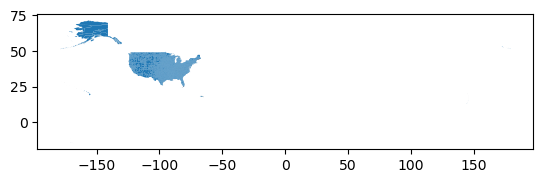

In [663]:
fig, ax = plt.subplots()
county_map.plot(ax=ax)

In [658]:
geometry = [Point(xy) for xy in zip(police_fatalities['Longitude'], police_fatalities['Latitude'])]

In [570]:
fatal_counties = police_df.groupby(['County', 'State']).size()
#fatal_counties.head()
fatal_counties = pd.DataFrame(fatal_counties)


In [571]:
fatalities = fatal_counties.reset_index()
police_victims = fatalities.rename(columns = {0: 'Fatalities'})
police_victims.head(10)

,County,State,Fatalities
0,ACADIA,LA,7
1,ACCOMACK,VA,2
2,ADA,ID,31
3,ADAIR,OK,6
4,ADAMS,CO,78
5,ADAMS,ID,2
6,ADAMS,IL,5
7,ADAMS,MS,6
8,ADAMS,NE,2
9,ADAMS,OH,1


In [572]:
police_victims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   County      2359 non-null   object
 1   State       2359 non-null   object
 2   Fatalities  2359 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 55.4+ KB


In [573]:
#Create a merged DataFrame that accounts for both total amounts of equipment and militarized equipment
analysis = pd.merge(merged_equipment, police_victims, on=['State', 'County'], how='outer')
analysis.fillna(0, inplace=True)

In [574]:
# pd.options.display.max_rows = 250

In [583]:
#County Scrub
# state = analysis[analysis['State'] == 'GU']
# state

,State,County,Total Equip Quantity,Total Cost,Mil Equip Quantity,Total Mil Cost,Fatalities
473,GU,GUAM,24121.0,5354822.2,79.0,9480.0,0.0


In [578]:
analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2960 entries, 0 to 2959
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   State                 2960 non-null   object 
 1   County                2960 non-null   object 
 2   Total Equip Quantity  2960 non-null   float64
 3   Total Cost            2960 non-null   float64
 4   Mil Equip Quantity    2960 non-null   float64
 5   Total Mil Cost        2960 non-null   float64
 6   Fatalities            2960 non-null   float64
dtypes: float64(5), object(2)
memory usage: 162.0+ KB


In [592]:
#Remove US territories
analysis = analysis[(analysis['State'] != 'PR') & (analysis['State'] != 'VI') & (analysis['State'] != 'GU')]

In [643]:
analysis.sample(20)

,State,County,Total Equip Quantity,Total Cost,Mil Equip Quantity,Total Mil Cost,Fatalities
1482,ND,KIDDER,1.0,138.00,1.0,138.00,0.0
2061,TN,LEWIS,82.0,147465.11,16.0,2154.00,2.0
1690,OH,GALLIA,508.0,726461.76,20.0,7399.00,1.0
1803,OK,STEPHENS,107.0,1157212.49,8.0,929722.62,5.0
887,KY,MADISON,26.0,375974.00,15.0,1800.00,7.0
2324,VA,DINWIDDIE,3.0,775.00,3.0,775.00,2.0
2128,TX,CALHOUN,7.0,648.84,3.0,414.00,0.0
2631,KY,CLAY,0.0,0.00,0.0,0.00,1.0
1966,SC,SPARTANBURG,159.0,6490968.96,12.0,799133.25,50.0
2545,WV,RANDOLPH,55.0,10206.00,53.0,7876.00,5.0


/Users/catherinefuller/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


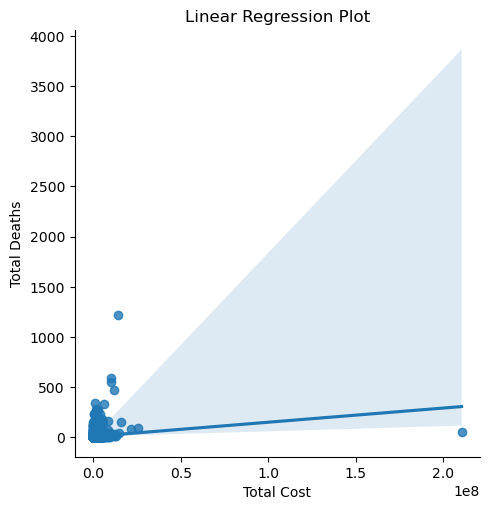

In [594]:
sns.lmplot(x='Total Cost', y='Fatalities', data=analysis)
plt.title('Linear Regression Plot')
plt.xlabel('Total Cost')
plt.ylabel('Total Deaths')
plt.show()

In [598]:
#Remove Extreme Outlier BREVARD, FL
analysis = analysis[analysis['County'] != 'BREVARD']

In [599]:
cost_sorted = analysis.sort_values(by='Total Cost', ascending=False)
cost_sorted.head(10)

,State,County,Total Equip Quantity,Total Cost,Mil Equip Quantity,Total Mil Cost,Fatalities
41,AL,JEFFERSON,61624.0,25605328.83,359.0,1233570.84,94.0
268,DC,DISTRICT OF COLUMBIA,4615.0,21740351.41,1351.0,7887349.62,79.0
179,CA,SACRAMENTO,56807.0,15623511.54,831.0,12568276.49,156.0
1964,SC,RICHLAND,2902.0,14866365.69,270.0,3331571.32,40.0
164,CA,LOS ANGELES,254046.0,14318050.88,3847.0,5786795.60,1217.0
1568,NJ,MONMOUTH,3372.0,12753645.28,14.0,414155.00,14.0
14,AL,CALHOUN,14322.0,12435577.32,243.0,1578262.46,29.0
33,AL,ETOWAH,3988.0,12194653.62,57.0,1003965.00,16.0
683,IN,CLARK,11412.0,11816915.22,104.0,39006.57,10.0
139,AZ,MARICOPA,66384.0,11743680.59,935.0,4166170.12,470.0


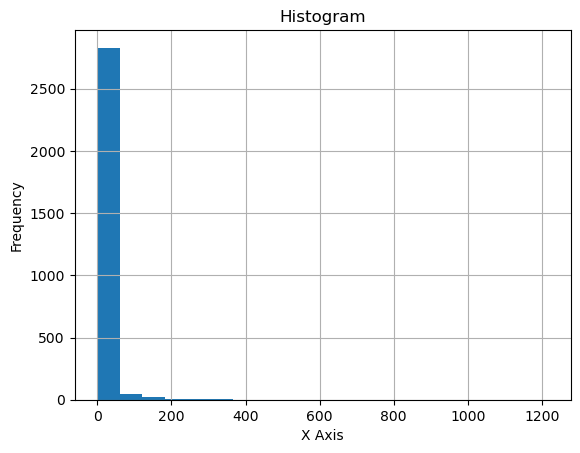

In [638]:
# Plot histogram
plt.hist(cost_sorted['Fatalities'], bins=20)
plt.title('Histogram')
plt.xlabel('X Axis')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [611]:
cost_sorted = analysis.sort_values(by='Total Cost', ascending=False)
cost_sorted.head(10)

,State,County,Total Equip Quantity,Total Cost,Mil Equip Quantity,Total Mil Cost,Fatalities
41,AL,JEFFERSON,61624.0,25605328.83,359.0,1233570.84,94.0
268,DC,DISTRICT OF COLUMBIA,4615.0,21740351.41,1351.0,7887349.62,79.0
179,CA,SACRAMENTO,56807.0,15623511.54,831.0,12568276.49,156.0
1964,SC,RICHLAND,2902.0,14866365.69,270.0,3331571.32,40.0
164,CA,LOS ANGELES,254046.0,14318050.88,3847.0,5786795.60,1217.0
1568,NJ,MONMOUTH,3372.0,12753645.28,14.0,414155.00,14.0
14,AL,CALHOUN,14322.0,12435577.32,243.0,1578262.46,29.0
33,AL,ETOWAH,3988.0,12194653.62,57.0,1003965.00,16.0
683,IN,CLARK,11412.0,11816915.22,104.0,39006.57,10.0
139,AZ,MARICOPA,66384.0,11743680.59,935.0,4166170.12,470.0


In [613]:
cost_sorted = analysis.sort_values(by='Fatalities', ascending=False)
cost_sorted.head(10)

,State,County,Total Equip Quantity,Total Cost,Mil Equip Quantity,Total Mil Cost,Fatalities
164,CA,LOS ANGELES,254046.0,14318050.88,3847.0,5786795.60,1217.0
601,IL,COOK,6458.0,10298413.19,1501.0,2994783.95,596.0
2175,TX,HARRIS,18223.0,10155122.40,225.0,1510855.63,547.0
139,AZ,MARICOPA,66384.0,11743680.59,935.0,4166170.12,470.0
181,CA,SAN DIEGO,11825.0,824472.16,165.0,181254.20,338.0
180,CA,SAN BERNARDINO,8085.0,5883724.63,133.0,4403334.00,330.0
178,CA,RIVERSIDE,240.0,1402022.25,238.0,1384545.00,280.0
175,CA,ORANGE,22853.0,2422146.50,416.0,1734719.92,271.0
1091,MI,WAYNE,10242.0,2887886.19,413.0,624724.20,269.0
2144,TX,DALLAS,6059.0,2012640.26,220.0,1630654.00,262.0


In [612]:
cost_sorted = analysis.sort_values(by='Total Mil Cost', ascending=False)
cost_sorted.head(10)

,State,County,Total Equip Quantity,Total Cost,Mil Equip Quantity,Total Mil Cost,Fatalities
179,CA,SACRAMENTO,56807.0,15623511.54,831.0,12568276.49,156.0
268,DC,DISTRICT OF COLUMBIA,4615.0,21740351.41,1351.0,7887349.62,79.0
164,CA,LOS ANGELES,254046.0,14318050.88,3847.0,5786795.60,1217.0
2301,VA,ARLINGTON,2002.0,6472163.00,361.0,5229496.15,13.0
180,CA,SAN BERNARDINO,8085.0,5883724.63,133.0,4403334.00,330.0
139,AZ,MARICOPA,66384.0,11743680.59,935.0,4166170.12,470.0
1523,NE,DOUGLAS,2406.0,4808898.84,525.0,4144859.00,78.0
629,IL,LAKE,1991.0,9726265.93,237.0,3519747.99,43.0
325,FL,ST LUCIE,243.0,4085543.05,54.0,3444746.00,24.0
1790,OK,OKLAHOMA,13234.0,4570810.96,782.0,3414207.76,184.0


In [614]:
no_zeros = analysis[analysis['Total Equip Quantity'] != 0]

In [615]:
no_zeros.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2527 entries, 0 to 2574
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   State                 2527 non-null   object 
 1   County                2527 non-null   object 
 2   Total Equip Quantity  2527 non-null   float64
 3   Total Cost            2527 non-null   float64
 4   Mil Equip Quantity    2527 non-null   float64
 5   Total Mil Cost        2527 non-null   float64
 6   Fatalities            2527 non-null   float64
dtypes: float64(5), object(2)
memory usage: 157.9+ KB


In [633]:
by_state = no_zeros.groupby('State').sum(numeric_only=True)

In [634]:
bar_chart= by_state.reset_index()
bar_chart

,State,Total Equip Quantity,Total Cost,Mil Equip Quantity,Total Mil Cost,Fatalities
0,AK,1110.0,6.719548e+05,172.0,537867.23,84.0
1,AL,175640.0,1.153394e+08,2912.0,12611890.12,624.0
2,AR,5627.0,2.174178e+07,1465.0,4669253.36,343.0
3,AZ,142875.0,3.638695e+07,1981.0,12796713.20,821.0
4,CA,648900.0,9.159060e+07,10307.0,47025359.03,4525.0
5,CO,42820.0,1.768371e+07,1871.0,6748742.23,613.0
6,CT,5051.0,7.920540e+06,794.0,6026662.00,134.0
7,DC,4615.0,2.174035e+07,1351.0,7887349.62,79.0
8,DE,34352.0,1.212959e+07,284.0,577190.15,59.0
9,FL,20951.0,4.222179e+07,6282.0,30248038.85,1655.0


In [637]:
bar_chart.columns

Index(['State', 'Total Equip Quantity', 'Total Cost', 'Mil Equip Quantity',
       'Total Mil Cost', 'Fatalities'],
      dtype='object')

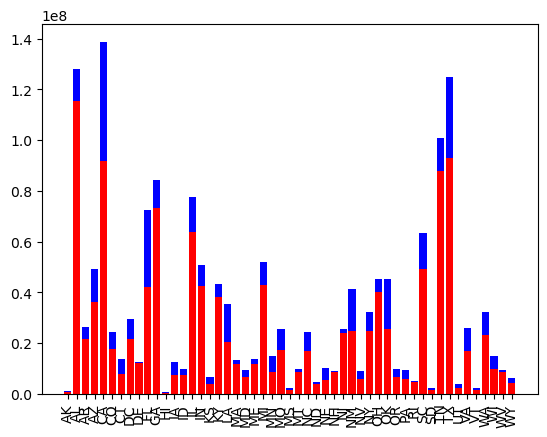

In [642]:
plt.bar(bar_chart['State'], bar_chart['Total Cost'], color='r')
plt.bar(bar_chart['State'], bar_chart['Total Mil Cost'], bottom=bar_chart['Total Cost'], color='b')
plt.xticks(rotation=90)
plt.show()